In [1]:
from IPython.display import Image

from segar.mdps import MDP
from segar.sim import Simulator
from segar.tasks.classic_control import MountainCarInitialization, MountainCarTask, MountainCarObservation, from_mountaincar_basis
from segar.tools.sample_trajectories import rollout, save_gif

/Users/rdevonhjelm/Code/segar/segar/factors/shapes.py:26: DeprecationWarning: Please use `ConvexHull` from the `scipy.spatial` namespace, the `scipy.spatial.qhull` namespace is deprecated.
  from scipy.spatial.qhull import ConvexHull, Delaunay
/Users/rdevonhjelm/Code/segar/segar/factors/shapes.py:26: DeprecationWarning: Please use `Delaunay` from the `scipy.spatial` namespace, the `scipy.spatial.qhull` namespace is deprecated.
  from scipy.spatial.qhull import ConvexHull, Delaunay


/Users/rdevonhjelm/miniconda3-x86/envs/segar/lib/python3.9/site-packages/gym/core.py:51: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


segar: -0.001666967175834045
segar: -0.001666967175834045
segar: -0.0016762635778622952
segar: -0.0016947816426352597
segar: -0.0017223644418204703
segar: -0.001758757771257689
segar: -0.001803587083537001
segar: -0.0018563260071982274
segar: -0.0019162560454294487
segar: -0.001982417251093334
segar: -0.002053550140914387
segar: -0.0021280299444522265
segar: -0.0022037956035643896
segar: -0.0022782778653650517
segar: -0.002348333431551189
segar: -0.002410195431020197
segar: -0.0024594542795414428
segar: -0.0024910867891261056
segar: -0.00249955427861277
segar: -0.002478991006498986
segar: -0.002423500650764063
segar: -0.00232756883146785
segar: -0.002186582401919881
segar: -0.0019974216121642556
segar: -0.0017590622200884252
segar: -0.001473097608661156
segar: -0.00114407532473777
segar: -0.0007795480754233622
segar: -0.00038977236899526445
segar: 1.2953116034765163e-05
segar: 0.00041524473572158126
segar: 0.000803755603592009
segar: 0.0011662916585495218
segar: 0.0014927532729161574
s

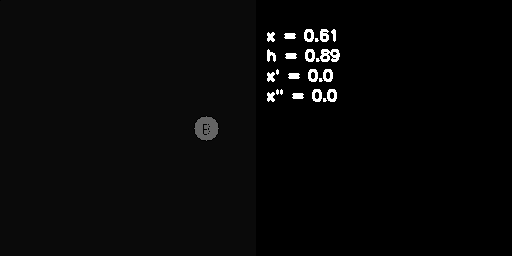

In [2]:
import numpy as np
sim = Simulator(friction=0., max_velocity=from_mountaincar_basis(0.7, recenter=False), gravity=0.0025, framerate=1)

initialization = MountainCarInitialization()
mountaincar_task = MountainCarTask(initialization)
observations = MountainCarObservation()
mdp = MDP(observations, mountaincar_task, max_steps_per_episode=200)
imgs, trajectories = rollout(mdp, show_render=True)

save_gif(imgs, out_path='mountaincar.gif')
Image(open('mountaincar.gif','rb').read())

In [3]:
import math
from gym.envs.classic_control import MountainCarEnv
import numpy as np

from segar.factors import Position, Velocity
from segar.tasks.classic_control import Angle, AngularVelocity, from_mountaincar_basis, to_mountaincar_basis

sim = Simulator(friction=0., max_velocity=from_mountaincar_basis(0.7, recenter=False), gravity=0.0025, framerate=1)

initialization = MountainCarInitialization()
mountaincar_task = MountainCarTask(initialization)
observations = MountainCarObservation()
mdp = MDP(observations, mountaincar_task, max_steps_per_episode=200)
mountaincar = sim.things['mountaincar']

env = MountainCarEnv()
env.kinematics_integrator = None
state = env.reset()
with mountaincar.in_place():
    mountaincar[Position] = np.array([from_mountaincar_basis(state[0]), 0.])
    mountaincar[Velocity] = np.array([from_mountaincar_basis(state[1], recenter=False), 0.])
assert np.allclose(mdp.observation(mdp.state), state), (mdp.observation(mdp.state), state)

for i in range(10):
    action = 0
    position = state[0]
    obs_mdp = mdp.step(action)[0]
    state = env.step(action)[0]
    assert np.allclose(obs_mdp, state)

gym: -0.002312520472871412
segar: -0.001312520472871412
segar: -0.001312520472871412
[ 0.33704468 -0.00231252] [ 0.3370447  -0.00231252]
gym: -0.002327250057353918
segar: -0.0013272501162539902
[ 0.33240491 -0.00463977] [ 0.3324049  -0.00463977]
gym: -0.0023566098178604035
segar: -0.0013566098512199174
[ 0.32540853 -0.00699638] [ 0.32540852 -0.00699638]
gym: -0.0024003830955747693
segar: -0.001400383049176734
[ 0.31601176 -0.00939676] [ 0.31601176 -0.00939676]
gym: -0.0024582002690112605
segar: -0.0014582002346870387
[ 0.3041568  -0.01185496] [ 0.3041568  -0.01185496]
gym: -0.0025294836619750623
segar: -0.0015294837300616022
[ 0.28977235 -0.01438445] [ 0.28977236 -0.01438445]
gym: -0.0026133709221843647
segar: -0.0016133709817825438
[ 0.27277453 -0.01699782] [ 0.27277455 -0.01699782]
gym: -0.002708614775706121
segar: -0.0017086148559707563
[ 0.2530681  -0.01970643] [ 0.2530681  -0.01970643]
gym: -0.0028134599443240906
segar: -0.0018134598932087898
[ 0.23054821 -0.02251989] [ 0.2305482 

/Users/rdevonhjelm/Code/segar/segar/__init__.py:29: UserWarning: Overwriting sim. This can have unexpected consequences if using old sim objects somewhere.
  warnings.warn(
